<a id="demo"></a>
# Short demo

Perceptrons are just another model in [Scikit](http://scikit-learn.org/stable/modules/neural_networks_supervised.html), isn't it? 

<a href="http://scikit-learn.org/stable/_images/sphx_glr_plot_mlp_alpha_0011.png"><img src="https://drive.google.com/uc?export=view&id=19crcivUVK83eyGEgKWo9qB7MFH8YiCah" width=400 heigth=400></a>

In [ ]:
import warnings 
warnings.filterwarnings('ignore') #For presentation purposes

from sklearn.linear_model import Perceptron

X = [[0., 0.], [1., 1.]]
y = [0, 1]


clf = Perceptron(random_state=1)

clf.fit(X, y) 

new_input=[[2., 2.], [-1., -2.]]
pred = clf.predict(new_input)

print("Predictions:", pred)

Predictions: [1 0]


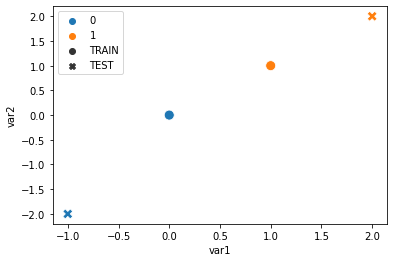

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
all_inputs = X + new_input
all_outs = list(y) + list(pred)
sns.scatterplot(x=[x[0] for x in all_inputs], 
                y=[x[1] for x in all_inputs],
                hue = all_outs,
                style=["TRAIN" for _ in range(len(X))] + ["TEST" for _ in range(len(new_input))],
                s=100)
plt.xlabel("var1")
plt.ylabel("var2")
plt.show()

Well, could be, but _totally_ not! :-)

Let's see them in detail!

# Perceptron model 

## "The Psychologists"

- Original motivation of earliest neural model, perceptrons, from "electronic" modeling of perception
- Influence of Psychology still visible in AI: visual processing, acoustic processing, natural language processing

### The Hero: 

The psychologist Frank Rosenblatt and the Mark I perceptron:

<a href="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRozuUtQVt1EyFVVfovXp5tC9iP3f5mM7tMy3jAlVaarA7gf_zE"><img src="https://drive.google.com/uc?export=view&id=1py-fIFQIj1Hp9sutMJWFoiyxU-3JJUBy" width=600 heigth=600></a>


### The hardware:
<a href="https://s3.amazonaws.com/s3.timetoast.com/public/uploads/photos/7146113/Mark-I.jpeg?1477813660"><img src="https://drive.google.com/uc?export=view&id=13uW_M5ouDSCtptLXqF92OzsoSAvqfGEo" width=600 heigth=600></a>

- Original perceptron models and their update mechanisms not aimed at digital computers but specialized analog hardware! 

(Hardware innovation - though not analog, but specialized - is kicking in again, see [here](https://www.engineering.com/Hardware/ArticleID/16753/The-Great-Debate-of-AI-Architecture.aspx).)


### The learning algorithm:
<a href="http://www.rutherfordjournal.org/images/TAHC_perceptron.jpg"><img src="https://drive.google.com/uc?export=view&id=1K7BFvi9OCytrCYcNakp8PycEb7cVla-A" width=600 heigth=600></a>

Inspiration of "learning rules" from ["Hebbian learning"](https://en.wikipedia.org/wiki/Hebbian_theory):
- Neural learning relying on local information only
- Correlation patters of neuron firing strengthen the synaptic connections
- Colloquially: "What fires together, wires together"
- Rather vague learning rule not applicable in practice
- Rather limited solutions until advent of backpropagation

(Backprop also extreme, since it relies too heavily on a distant supervision signal - so there is maybe a way to have a "semi-hebbian" learning procedure - see "synthetic gradients" in a later lecture.) 


## Biological motivation (recapitulation)

### Representation
<a href="http://drive.google.com/uc?export=view&id=1tedMjIowYM8Y68C8fRrZJ2JRsFRQx1P5"><img src="https://drive.google.com/uc?export=view&id=1nF5EfVhgia0Zzpm5woRlBJ-KXSthV9e9"></a>

### Thresholding

- Neurons do not "fire" continuously
- Their activation has to be modeled with some kind of a step function

<a href="http://www.saedsayad.com/images/ANN_Unit_step.png"><img src="https://drive.google.com/uc?export=view&id=1XDNopwwsVTCLnC4ioN8tv1xbfLYlF9-e"></a>

Simplest "nonlinearity" - later we will encounter a plethora of others

<a href="http://slideplayer.com/slide/5214241/16/images/5/Perceptron:+Linear+threshold+unit.jpg"><img src="https://drive.google.com/uc?export=view&id=1Da8YDVCuy4wDyrLTBEcCySn8qBdOs3Yx"></a>

**Attention**

- $x_{1..n}$ are the input values, "input activations"
- $x_{0}$ is also present! -- This is the  "bias unit", or "bias term"
<a href="https://raw.githubusercontent.com/qingkaikong/blog/master/39_ANN_part2_step_by_step/figures/figure1_perceptron_structure.jpg"><img src="https://drive.google.com/uc?export=view&id=1fGwrmYGp8D6mwI1ZgbVb5R33IqLS1P2z"></a>
- Shouldn't be confused with concept of "bias" met when discussing overfitting, although  semantics is similar: a general "prejudice" which determines the behavior of the system

### "Biological inspiration"


<a href="http://drive.google.com/uc?export=view&id=1D75C1LThbDYqs4gYUz5kC8cZJprQHBPB"><img src="https://drive.google.com/uc?export=view&id=1EQa7ODziQoOVoLi1nZZ2yyJfOxBgrqr8" width=55%></a>


[source](https://www.facebook.com/photo.php?fbid=2063218160389423&set=gm.2075284019202050&type=3&theater)

## Capable of modeling logical operations
- Logic considered pinnacle of cognitive activities
- "It can learn, it models logic, what else would be needed?"
- Perceptron's problems with modeling certain logical functions had huge effect in history of AI. 

##  Artificial neuron -- mathematical model

(the mathematical discussion follows mainly that of [Hal Daumé III](http://ciml.info/dl/v0_99/ciml-v0_99-ch04.pdf))

### Activation function

with 
- $\mathbf x = \langle x_1,...,x_D \rangle $ incoming activations, 
- $\mathbf w = \langle w_1,...,w_D \rangle$ weights, and
- $b$ bias

the outgoing activation is

$a(x_1,...,x_D) = \sum_{d=1}^D w_d x_d +b$ where

If $a(\mathbf{x}) \geq 0$ then the input is classified as a positive if $a(\mathbf{x}) < 0$ then as a negative instance.
 



<a id="learning"></a>
# Learning

## Inspiration: Hebbian learning

[Hebbian learning rule](https://en.wikibooks.org/wiki/Artificial_Neural_Networks/Hebbian_Learning)
- One of the oldest learning rules
- If there is a high correlation between the outputs of two neurons at the two ends of a synapse ("they fire together") then the strength of the synapse should be increased ("what fires together wires together"). 

$ w_{ij}[n+1]=w_{ij}[n]+\eta x_{i}[n]x_{j}[n]$

Where:

- $n$ is the current time step.
- $x_{i},x_{j}$ are the activations of the two neurons
- $w$ is the strength of the synapse (later: "weight")
- $\eta$ is the learning rate

## The perceptron algorithm

1. for all $d\in 1..D$: $w_d \leftarrow 0$ (initialize weights)
2. $b \leftarrow 0$ (initialize bias) 
3. $\mathit{EpochCount}$ times: for all $(\mathbf{x}, y)$ training examples
   - Calculate the $a= \mathbf w \mathbf x + b$ activation
   - If $ya \leq 0$ (wrong or 0 prediction):
       - $\mathbf{w} \leftarrow \mathbf{w} + y\mathbf{x}$
       - $b \leftarrow b + y$
       
(In more complex formulations there is also a learning rate parameter (most frequently signified by $\eta$). Using this parameter the learning step would be:

- $\mathbf{w} \leftarrow \mathbf{w} + \eta y\mathbf{x}$
- $b \leftarrow b$ + $\eta y$

accordingly, the above simpler but perfectly functional(!) version uses a learning rate  $\eta=1$.)

### Why is this a useful update rule?

Later we will see that the algorithm is guaranteed to a find a separator if the data set is separable. Regardless, it is simple to see that the update step changes the perceptron's output on the incorrectly classified example in the right direction, since the difference between the outputs before and after update:

$$[(\mathbf w + y\mathbf x)\mathbf x + b + y] - [\mathbf w x + b] = y\mathbf x^2 + y = y (\mathbf x^2 + 1)$$

that is, the output increases at least by 1 if the misclassified example was positive and decreases at least by 1 if it was negative.

   
##  Complexity contrast with other learning algorithms

### Perceptron algorithm

Update was possible simply by rotating potentiometers (in the case of binary vectors by a single step forward or backward).
#### vs, for instance, Newton's method

Other methods for reducing the error rate can be way more complex. For instance, Newton's method, which approximates the minimum of the error function by using Newton's method to find its critical point:

<a href="https://www.researchgate.net/profile/Daniel_Marcsa2/publication/266091369/figure/fig5/AS:476476194725892@1490612185738/The-geometrical-construction-of-Newton-Raphson-method.png"><img src="https://drive.google.com/uc?export=view&id=1CRdZS-0tQuE3SEo7Yn5oeeX6IJluShYx" width=40%></a>

In the (typical) multidimensional case,

- this requires the computation of the Hessian matrix, which consists of all second order partial derivatives 
- moreover, the Hessian needs to be inverted

## EpochCount and order of processing

- If the order of training examples is wrong then the perceptron learns only from a few examples
- The order is so significant that a random shuffle of the original training data typically results in a 20% faster convergence.

## Geometrical interpretation

The **decision boundary** of a perceptron with $\mathbf w$ weights and  $b$ bias is the set of possible inputs for which the activation is 0, that is, the set

$$\left\{\mathbf x : \sum_{d=1}^D w_d x_d + b = 0\right\} = \{\mathbf x: \mathbf w \mathbf x + b = 0 \}$$ 

If $b = 0$ then the decision boundary is $\{\mathbf x: \mathbf w \mathbf x = 0 \}$, which is the set of vectors that are perpendicular to $\mathbf  w$, therefore the boundary is a  *hyperplane* which is perpendicular to  $\mathbf w$ and crosses the $\mathbf 0$ vector.

<a href="https://ds055uzetaobb.cloudfront.net/image_optimizer/947723b3ba09371025dac3dab038f6b79a9ea2d3.png"><img src="https://drive.google.com/uc?export=view&id=1hC2kVGM-yuYOw5PNW7mH4GyPRIE32sMC"  height="400"></a>

In addition, if $\mathbf w$ is a unit vector (we can assume that, since the decision boundary is determined solely by its direction), then the $\mathbf w \mathbf x$ activation will simply be the _signed projection_ of $\mathbf x$  to $\mathbf w$. On one side of the hyper plane the projection will be positive while on the other side negative, so the plane _separates_ the inputs which are predicted to be positive and negative.

<a href="http://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/images/perceptron/perceptron_img1.png"><img src="https://drive.google.com/uc?export=view&id=1Bc0zOu1qD6c5Gey8hnjaO3gHRhQ2VRFc"  height="400" ></a>

The role of the $b$ bias is to *move* to separator hyperplane in parallel with  $\mathbf w$ by exactly  $-b$ units.

## The hypercone of the good solutions

<a href="http://drive.google.com/uc?export=view&id=1KIZ9QUaLL2SisNrzwegoa9WA5B2e31IL"><img src="https://drive.google.com/uc?export=view&id=1HVtk-4g5BSegzt3AqFKMHrB8vwjFaA0t" height="400"></a>

(Source: Hinton - Neural networks for machine learning)

## Margin

If the positive and negative examples of a $\mathbf D$ data set are separated by the  hyperplane determined by a $\mathbf w$ unit weight vector and $b$ bias then the minimum of the activations on $\mathbf D$ is the separator's _margin_:

$$\mathrm{Margin}(\mathbf D, \mathbf w, b) = \min_{(\mathbf x, y) \in \mathbf D} y(\mathbf w \mathbf x + b)$$

This is simply the minimum of the distances from the separator hyperplane. The margin of a data set can also be defined, this is the largest possible margin:

$$\mathrm{Margin}(\mathbf D) = \sup_{\mathbf w, b}\mathrm{Margin}(\mathbf D, \mathbf w, b)$$


##  Convergence theorem
Let's assume that for a $\mathbf D$ data set in which $\forall \mathbf x_i: \|\mathbf x_i\|\leq 1$ there exists a $\mathbf{w^*}$ optimal separator with the maximal $\gamma$ margin, and the algorithm is performed with the a $\mathbf w_0,...,\mathbf w_i,\dots$ update steps (for simplicity we assume that the bias is $0$ and the $\mathbf w^*$ is chosen to be a unit vector -- none of these assumptions is essential for the result). In that case the algorithm finds a separator in a finite $k$ number of update steps, and, moreover, $k$ is guaranteed  to satisfy

$$ k \leq \frac{1}{\gamma^2}$$

The key idea is to prove that the angle between  $\mathbf {w}^*$ and $\mathbf {w}_i$ decreases to the degree needed for the linear separation in a finite number of update steps.


## Advantages and disadvantages of perceptron algorithm
__Advantages__:
- online --  processes one example at a time and possibly improves the model on the basis of this example. $\Rightarrow$ Capable of continuously processing new incoming examples.
- fast and simple
- convergence theorem

__Disadvantages__
- in contrast to SVM, there is no guarantee that the resulting separator is optimal.
- error-driven: it can change a 99.99% precision model because of a single error
- convergence is guaranteed only when there does exist a separator! And that-- as we will see -- is not always the case...

<a id="advancedperceptrons"></a>
# Advanced perceptrons

##  The problem

Later examples have too large influence on the learned weights -- a last update can change a weigth vector that worked well for all other examples (!).

## Solutions

### Voting

The weights and bias are stored at every update, together with number of correct predictions since the last update. The learning process is unchanged, but in the prediction stage the system generates a prediction with all stored weights + bias values and the result is computed as the weighted sum of all of these predictions,  where the weights are the stored "survival times". Problem: Requires a huge amount of memory.

### Averaged perceptron

Similar, but more practical alternative: prediction is performed with the weighted average of the weights and biases that were generated during the learning process -- weights are, again, the "survival times".  In contrast to voting, here it is enough to maintain a rolling weighted average during the learning phase, so the additional memory consumption is negligible.


In [ ]:
#### example with just one weight to show that keeping rolling weighted averaging is enough:

a = [1, -1, 2]      # weight of perceptrons
b = [10, 5, 100]    # survival times (weights of the weights)

c = [a[i]*b[i] for i in range(len(a))]  # pointwise multiplication
wa1 = sum(c)/len(c)     # mean
print(wa1, "\t= t(i) weighted average of weights" )

a2 = a + [3]        # a new perceptron weight
b2 = b + [200]      # its survival time

c2 = [a2[i]*b2[i] for i in range(len(a2))]
wa2 = sum(c2)/len(c2)
print(wa2, "\t= t(i+1) weighted average of weights using the stored weights and survival times")

wa2b = (wa1*(len(c2)-1) + (3*200))/len(c2)
print(wa2b, "\t= t(i+1) weighted average of weights using previous weighted average of weights")


68.33333333333333 	= t(i) weighted average of weights
201.25 	= t(i+1) weighted average of weights using the stored weights and survival times
201.25 	= t(i+1) weighted average of weights using previous weighted average of weights


# Limitations

### Minsky & Papert (1969): "Perceptrons"

<a href="http://slideplayer.com/slide/775779/3/images/41/Minsky+&+Papert+(1969).jpg"><img src ="https://drive.google.com/uc?export=view&id=15clKwCvInuqSkbhH_f5GYhVphbtTBPqK" width=600 heigth=600></a>

#### A very general perceptron definition
multiple layers and nonlinearity are possible

<a href="http://drive.google.com/uc?export=view&id=1ipkPyUFpS8bfTrXNIy6CqMOOAzm14Z9j"><img src="https://drive.google.com/uc?export=view&id=1y9a4JaeJoTbf6v6IMNQx8e7c1D1mdHlv" width=600 heigth=600></a>

#### Criticism

> Perceptrons have been widely publicized as "pattern recognition" or "learning" machines and as such have been discussed in a large number of books, journal articles, and voluminous "reports." Most of this writing (some exceptions are mentioned in our bibliography) is without scientific value and we will not usually refer by name to the works we criticize. The sciences of computation and cybernetics began, and it seems quite rightly so, with a certain flourish of romanticism. They were laden with attractive and exciting new ideas which have already
borne rich fruit. Heavy demands of rigor and caution could have held this development to a much slower pace; only the future could tell which directions were to be the best.

##### "The Seductive Powers of Perceptrons"

> Thus "programming" takes on a pleasingly homogeneous form. Moreover since "programs" are representable in a
[multi]-dimensional space, they inherit a metric which makes it easy to imagine a kind of automatic programming which people have been tempted to call learning', by attaching feedback devices to the parameter controls they propose to "program" the machine by providing it with a sequence of input patterns and an "error signal" which will cause the coefficients to change in the right direction when the machine makes an inappropriate decision.

#### Goal: precise theory + what can they be used for? 
- Perceptrons are "massively parallel" machines -- these architectures were not so well understood as the classic sequential ones.
- Although they write about multilayer perceptrons too, their most important _theorems_ concern single layer linear perceptrons.
- Focus: perceptrons as visual pattern recognizers (this was their main application area at the time)
- Negative results: some predicates, e.g., parity, connectedness etc. cannot be represented by certain types of perceptrons.  Their most well known result of this type is the XOR operation:
 
## XOR Problem
- It was important to model logical operators
- "Feeding" 0,1 input the output should be the corresponding operation result
- A perceptron can model a logical operation only if it is linearly separable

### The truth table of XOR

<a href="https://www.dyclassroom.com/image/topic/logic-gate/xor-xnor/xor-table.png"><img src="https://drive.google.com/uc?export=view&id=1Sqe9kQz1vNImvBzlFtVEQpazd6FQt6Lg" width=300 heigth=300></a>

### Problem
$x1$ and $x2$ represents $A$ and $B$
<a href="http://drive.google.com/uc?export=view&id=1m59mOWDu7yShgMpSgw2yC8YDVzi1-fzs"><img src="https://drive.google.com/uc?export=view&id=1Ci6_UtG_Lr2UnwQQv6r86382TnSfGTf5" style="width: 80%;"></a>
 
### The XOR proof
Let us assume, toward a contradiction, that a $w_1,w_2, b$ perceptron computes XOR. Then

1. $w_1 + b > 0$
2. $w_2 + b > 0$
3. $w_1 + w_2 + b \leq 0$
4. $b \leq 0 $

But adding (1) and (2) we have: $w_1 + w_2 + 2b > 0$ 

And adding (3) and (4) we get: $w_1 + w_2 + 2b \leq 0$, which is a contradiction.

